# **Project 2**, APS1070 Summer 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Jun 25, 11 PM - 15 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Manoj Chandra Machavolu
*   Student Number: 1008518506

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____ **[0.1]** Answers below
* What features in the dataset are present aside from the 28 main features?  _____ **[0.1]** Answers below
* Which column contains the targets? **[0.1]**
* What is the meaning of target values?_____ **[0.1]** Answers below

In [141]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [143]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [145]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


1) There are 284807 rows.<br>
2) Apart from the 28 main features, there are 3 additional features namely Time, Amount and Class.<br>
3) The column named 'Class' contains the targets.<br>
4) The target values comprises of 0's and 1's<br>
**0 -**  Transaction Valid<br>
**1 -**  Transaction Fraud<br> 

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class distribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**
* What metrics should we use to evaluate a model in such cases? _________ **[0.2]**


In [146]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [147]:
print('The percentage of valid transactions in the dataset is ',((df['Class']==0).sum()/(df.shape[0]))*100)

The percentage of valid transactions in the dataset is  99.82725143693798


In [148]:
print('The percentage of fraud transactions in the dataset is ',((df['Class']==1).sum()/(df.shape[0]))*100)

The percentage of fraud transactions in the dataset is  0.1727485630620034


This dataset is highly imbalanced because it contains lot of valid transactions compared to very fewer fraud transactions<br>
The number of valid transactions are nearly 600 times the fraud transactions.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.<br>
This results in models that have poor predictive performance, specifically for the minority class.<br>
This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.<br>
The performance of KNN classifier is significantly affected by imbalance dataset. This is because, the probability that the k nearest neighbors of any random point will belong to the class with more examples becomes higher.

In such cases F1 score metric and Confusion matrix are used to evaluate a model

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [149]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [150]:
### Split the data  ###

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=40)

In [151]:
print('Train dataset shape', X_train.shape)
print('Validation dataset shape', X_val.shape)
print('Test dataset shape', X_test.shape)

Train dataset shape (193668, 30)
Validation dataset shape (48417, 30)
Test dataset shape (42722, 30)


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

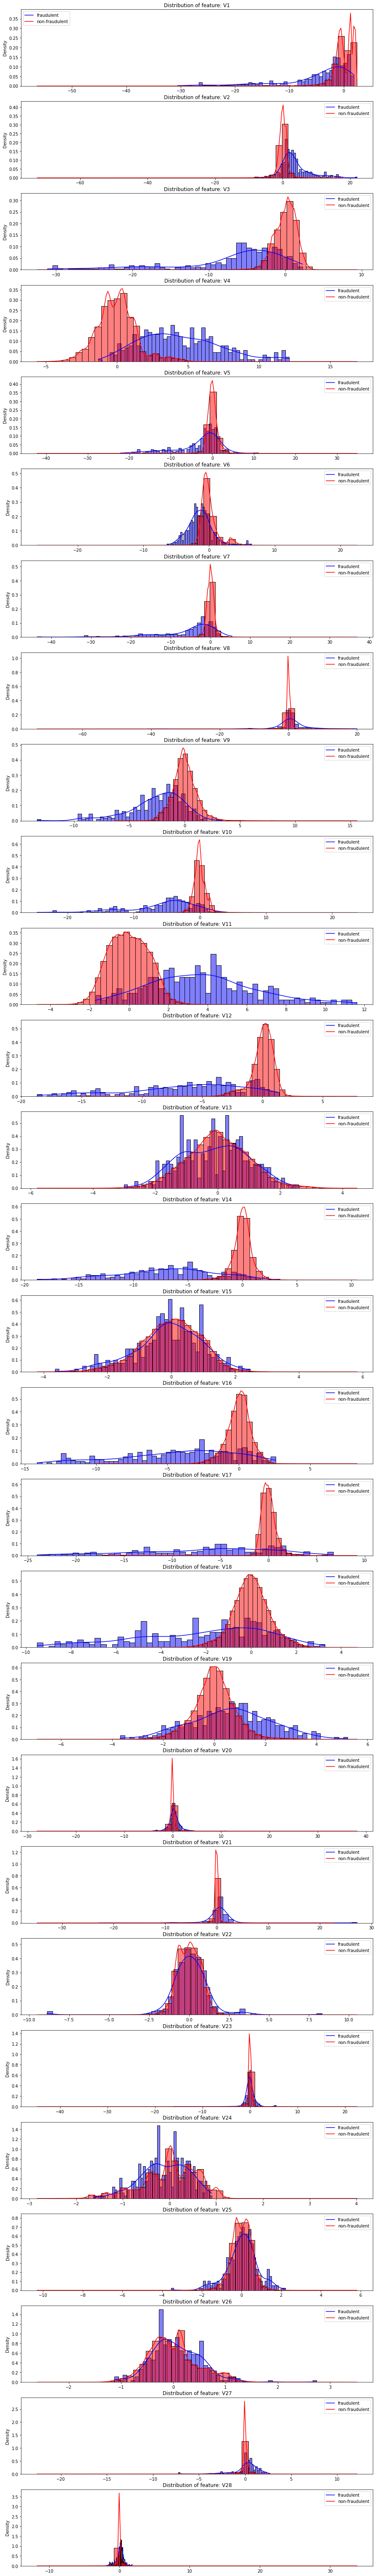

In [152]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

Anomaly can be viewd as an unusual observation in a dataset. In this case, fraudulent transactions are considered as an anomaly as fraud cases are few compared to valid transactions. From the above graphs, we can say that the features that deviate from common statistical properties of a distribution such as mean and variance are very important.<br>
Features V12, V14, V16, V18 and V19 show very high variance on fraudulent transactions, Hence these features should be taken into consideration while modeling.

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way! Hint: See Tutorial 2's methods of coming up with thresholds) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why? **[0.5]**


2 a)

In [153]:
features=[f for f in X_train.columns if 'V' in f]

In [154]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
auc_train=[]
auc_val=[]
for i in features:
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
  gm.fit(pd.DataFrame(X_train[i]))
  p = gm.score_samples(pd.DataFrame(X_train[i]))
  q = gm.score_samples(pd.DataFrame(X_val[i]))
  fpr_sc_train, tpr_sc_train, _ = roc_curve(y_train, -1 * p)
  fpr_sc_val, tpr_sc_val, _ = roc_curve(y_val, -1 * q)
  auc_train.append(format(auc(fpr_sc_train, tpr_sc_train) , ".3f"))
  auc_val.append(format( auc(fpr_sc_val, tpr_sc_val) , ".3f"))


In [155]:
df_auc_train = pd.DataFrame(auc_train)
df_auc_val = pd.DataFrame(auc_val)
df_auc_train.set_axis(['AUC Train'], axis=1, inplace=True)
df_auc_val.set_axis(['AUC Validation'], axis=1, inplace=True)

In [156]:
result = pd.concat([df_auc_train, df_auc_val], axis=1, join='inner')
result['Features'] = features
result.sort_values(by=['AUC Validation'],ascending=False)

,AUC Train,AUC Validation,Features
13,0.946,0.966,V14
16,0.924,0.943,V17
9,0.908,0.925,V10
11,0.905,0.917,V12
15,0.893,0.908,V16
10,0.895,0.895,V11
6,0.865,0.892,V7
3,0.889,0.885,V4
2,0.864,0.875,V3
1,0.843,0.874,V2


The best 3 features extracted based on the AUC of the validation set are:<br>
1) V14<br>
2) V17<br>
3) V10

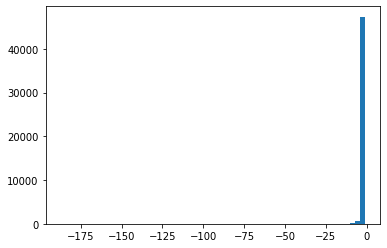

In [157]:
g_m_V14 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
g_m_V14.fit(pd.DataFrame(X_train['V14']))
p_gm_V14 = g_m_V14.score_samples(pd.DataFrame(X_val['V14']))
_ = plt.hist (p_gm_V14 , bins = 60)

In [ ]:
sorted(p_gm_V14)

In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-100, -50 ,-40, -30 , -20, -18, -17, -15, -14, -13, -10, -5]:
   #precision = precision_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using precision
   #recall = recall_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, p_gm_V14 < tr)
   print('For threshold of ',tr,' F1-score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -100  F1-score:  0.126
For threshold of  -50  F1-score:  0.342
For threshold of  -40  F1-score:  0.450
For threshold of  -30  F1-score:  0.576
For threshold of  -20  F1-score:  0.624
For threshold of  -18  F1-score:  0.633
For threshold of  -17  F1-score:  0.633
For threshold of  -15  F1-score:  0.636
For threshold of  -14  F1-score:  0.624
For threshold of  -13  F1-score:  0.609
For threshold of  -10  F1-score:  0.526
For threshold of  -5  F1-score:  0.202


Thus the best threshold for feature V14 is -15

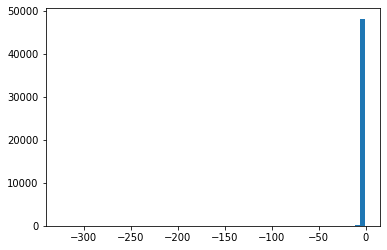

In [160]:
g_m_V17 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
g_m_V17.fit(pd.DataFrame(X_train['V17']))
p_gm_V17 = g_m_V17.score_samples(pd.DataFrame(X_val['V17']))
_ = plt.hist (p_gm_V17 , bins = 60)

In [ ]:
sorted(p_gm_V17)

In [162]:
print ("Method 1: ")

for tr in [-150, -50 ,-40, -30 , -20, -18, -17, -15, -14, -13, -10, -5]:
   #precision = precision_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using precision
   #recall = recall_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, p_gm_V17 < tr)
   print('For threshold of ',tr,' F1-score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -150  F1-score:  0.180
For threshold of  -50  F1-score:  0.516
For threshold of  -40  F1-score:  0.520
For threshold of  -30  F1-score:  0.544
For threshold of  -20  F1-score:  0.595
For threshold of  -18  F1-score:  0.600
For threshold of  -17  F1-score:  0.593
For threshold of  -15  F1-score:  0.570
For threshold of  -14  F1-score:  0.579
For threshold of  -13  F1-score:  0.574
For threshold of  -10  F1-score:  0.500
For threshold of  -5  F1-score:  0.235


Thus the best threshold for feature V17 is -18

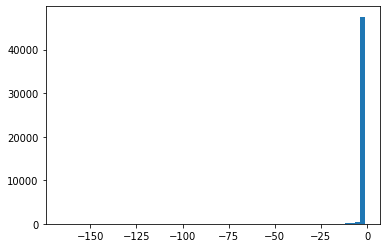

In [163]:
g_m_V10 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
g_m_V10.fit(pd.DataFrame(X_train['V10']))
p_gm_V10 = g_m_V10.score_samples(pd.DataFrame(X_val['V10']))
_ = plt.hist (p_gm_V10 , bins = 60)

In [ ]:
sorted(p_gm_V10)

In [165]:
print ("Method 1: ")

for tr in [-50 ,-40, -30 , -20, -18, -17, -15, -14, -13, -10, -9, -8, -7, -5]:
   #precision = precision_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using precision
   #recall = recall_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, p_gm_V10 < tr)
   print('For threshold of ',tr,' F1-score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -50  F1-score:  0.182
For threshold of  -40  F1-score:  0.169
For threshold of  -30  F1-score:  0.197
For threshold of  -20  F1-score:  0.187
For threshold of  -18  F1-score:  0.187
For threshold of  -17  F1-score:  0.183
For threshold of  -15  F1-score:  0.200
For threshold of  -14  F1-score:  0.205
For threshold of  -13  F1-score:  0.205
For threshold of  -10  F1-score:  0.212
For threshold of  -9  F1-score:  0.214
For threshold of  -8  F1-score:  0.197
For threshold of  -7  F1-score:  0.195
For threshold of  -5  F1-score:  0.177


Thus the best threshold for feature V10 is -9 (from method 1)

In [166]:
### To calculate Precision and Recall of train and validation set using threshold of -15 (calculated using feature V14)
tr1 = -15

p_gm_val = g_m_V14.score_samples(pd.DataFrame(X_val['V14']))
p_gm_train = g_m_V14.score_samples(pd.DataFrame(X_train['V14']))

precision_train_tr1 = precision_score(y_train, p_gm_train < tr1) 
recall_train_tr1 = recall_score(y_train, p_gm_train < tr1) 
f1score_train_tr1 = f1_score(y_train, p_gm_train < tr1)

precision_val_tr1 = precision_score(y_val, p_gm_val < tr1) 
recall_val_tr1 = recall_score(y_val, p_gm_val < tr1) 
f1score_val_tr1 = f1_score(y_val, p_gm_val < tr1)


In [167]:
tr2 = -18

p_gm_val = g_m_V17.score_samples(pd.DataFrame(X_val['V17']))
p_gm_train = g_m_V17.score_samples(pd.DataFrame(X_train['V17']))

precision_train_tr2 = precision_score(y_train, p_gm_train < tr2) 
recall_train_tr2 = recall_score(y_train, p_gm_train < tr2) 
f1score_train_tr2 = f1_score(y_train, p_gm_train < tr2)

precision_val_tr2 = precision_score(y_val, p_gm_val < tr2) 
recall_val_tr2 = recall_score(y_val, p_gm_val < tr2) 
f1score_val_tr2 = f1_score(y_val, p_gm_val < tr2)


In [168]:
tr3 = -9

p_gm_val = g_m_V10.score_samples(pd.DataFrame(X_val['V10']))
p_gm_train = g_m_V10.score_samples(pd.DataFrame(X_train['V10']))

precision_train_tr3 = precision_score(y_train, p_gm_train < tr3) 
recall_train_tr3 = recall_score(y_train, p_gm_train < tr3) 
f1score_train_tr3 = f1_score(y_train, p_gm_train < tr3)

precision_val_tr3 = precision_score(y_val, p_gm_val < tr3) 
recall_val_tr3 = recall_score(y_val, p_gm_val < tr3) 
f1score_val_tr3 = f1_score(y_val, p_gm_val < tr3)


In [169]:
print('For threshold of ',tr1,' \t precision train: ', '%.3f' % precision_train_tr1,' \t recall train: ', '%.3f' % recall_train_tr1,' \t\t f1 score train: ', '%.3f' % f1score_train_tr1) 
print('For threshold of ',tr1,' \t precision validation: ', '%.3f' % precision_val_tr1,' \t recall validation: ', '%.3f' % recall_val_tr1,' \t f1 score validation: ', '%.3f' % f1score_val_tr1) 
print('For threshold of ',tr2,' \t precision train: ', '%.3f' % precision_train_tr2,' \t recall train: ', '%.3f' % recall_train_tr2,' \t\t f1 score train: ', '%.3f' % f1score_train_tr2) 
print('For threshold of ',tr2,' \t precision validation: ', '%.3f' % precision_val_tr2,' \t recall validation: ', '%.3f' % recall_val_tr2,' \t f1 score validation: ', '%.3f' % f1score_val_tr2) 
print('For threshold of ',tr3,' \t precision train: ', '%.3f' % precision_train_tr3,' \t recall train: ', '%.3f' % recall_train_tr3,' \t\t f1 score train: ', '%.3f' % f1score_train_tr3) 
print('For threshold of ',tr3,' \t precision validation: ', '%.3f' % precision_val_tr3,' \t recall validation: ', '%.3f' % recall_val_tr3,' \t f1 score validation: ', '%.3f' % f1score_val_tr3)

For threshold of  -15  	 precision train:  0.498  	 recall train:  0.630  		 f1 score train:  0.556
For threshold of  -15  	 precision validation:  0.578  	 recall validation:  0.708  	 f1 score validation:  0.636
For threshold of  -18  	 precision train:  0.587  	 recall train:  0.546  		 f1 score train:  0.566
For threshold of  -18  	 precision validation:  0.630  	 recall validation:  0.573  	 f1 score validation:  0.600
For threshold of  -9  	 precision train:  0.111  	 recall train:  0.501  		 f1 score train:  0.182
For threshold of  -9  	 precision validation:  0.134  	 recall validation:  0.528  	 f1 score validation:  0.214


Complexity of the model is O(N) - linear time since there is only one for loop in estimating the threshold<br>


**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why? **[0.5]**

In [170]:
X_df_train_new = X_train.join(pd.DataFrame(y_train))
X_df_train_new = X_df_train_new[X_df_train_new["Class"] == 0]

In [171]:
X_train_new = X_df_train_new.drop(['Class'],axis=1)
y_train_new = X_df_train_new['Class']

In [172]:
X_df_val_new = X_val.join(pd.DataFrame(y_val))
X_df_val_new = X_df_val_new[X_df_val_new["Class"] == 0]

In [173]:
X_val_new = X_df_val_new.drop(['Class'],axis=1)
y_val_new = X_df_val_new['Class']

In [174]:
features=[f for f in X_train_new.columns if 'V' in f]

In [175]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
auc_train=[]
auc_val=[]
for i in features:
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
  gm.fit(pd.DataFrame(X_train_new[i]))
  p = gm.score_samples(pd.DataFrame(X_train[i]))
  q = gm.score_samples(pd.DataFrame(X_val[i]))
  fpr_sc_train, tpr_sc_train, _ = roc_curve(y_train, -1 * p)
  fpr_sc_val, tpr_sc_val, _ = roc_curve(y_val, -1 * q)
  auc_train.append(format(auc(fpr_sc_train, tpr_sc_train) , ".3f"))
  auc_val.append(format( auc(fpr_sc_val, tpr_sc_val) , ".3f"))


In [176]:
df_auc_train = pd.DataFrame(auc_train)
df_auc_val = pd.DataFrame(auc_val)
df_auc_train.set_axis(['AUC Train'], axis=1, inplace=True)
df_auc_val.set_axis(['AUC Validation'], axis=1, inplace=True)

In [177]:
result = pd.concat([df_auc_train, df_auc_val], axis=1, join='inner')
result['Features'] = features
result.sort_values(by=['AUC Validation'],ascending=False)

,AUC Train,AUC Validation,Features
13,0.946,0.966,V14
16,0.924,0.943,V17
9,0.908,0.925,V10
11,0.906,0.918,V12
15,0.893,0.909,V16
10,0.895,0.895,V11
6,0.865,0.892,V7
3,0.890,0.886,V4
2,0.865,0.877,V3
1,0.843,0.874,V2


In [178]:
g_m_V14_b = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
g_m_V14_b.fit(pd.DataFrame(X_train_new['V14']))
p_gm_V14_b = g_m_V14_b.score_samples(pd.DataFrame(X_val['V14']))

In [ ]:
sorted(p_gm_V14_b)

In [180]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-170, -50 ,-40, -30 , -20, -18, -17, -15, -14, -13, -10, -5]:
   #precision = precision_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using precision
   #recall = recall_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, p_gm_V14_b < tr)
   print('For threshold of ',tr,' F1-score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -170  F1-score:  0.022
For threshold of  -50  F1-score:  0.386
For threshold of  -40  F1-score:  0.484
For threshold of  -30  F1-score:  0.596
For threshold of  -20  F1-score:  0.640
For threshold of  -18  F1-score:  0.621
For threshold of  -17  F1-score:  0.636
For threshold of  -15  F1-score:  0.615
For threshold of  -14  F1-score:  0.605
For threshold of  -13  F1-score:  0.584
For threshold of  -10  F1-score:  0.485
For threshold of  -5  F1-score:  0.172


The best threshold for feature V14 in this case is -20

In [181]:
g_m_V17_b = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
g_m_V17_b.fit(pd.DataFrame(X_train_new['V17']))
p_gm_V17_b = g_m_V17_b.score_samples(pd.DataFrame(X_val['V17']))

In [ ]:
sorted(p_gm_V17_b)

In [183]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-100, -50 ,-40, -30 , -29, -28, -27, -25, -20, -18, -17, -15, -10]:
   #precision = precision_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using precision
   #recall = recall_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, p_gm_V17_b < tr)
   print('For threshold of ',tr,' F1-score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -100  F1-score:  0.417
For threshold of  -50  F1-score:  0.520
For threshold of  -40  F1-score:  0.541
For threshold of  -30  F1-score:  0.571
For threshold of  -29  F1-score:  0.591
For threshold of  -28  F1-score:  0.609
For threshold of  -27  F1-score:  0.610
For threshold of  -25  F1-score:  0.595
For threshold of  -20  F1-score:  0.584
For threshold of  -18  F1-score:  0.570
For threshold of  -17  F1-score:  0.583
For threshold of  -15  F1-score:  0.573
For threshold of  -10  F1-score:  0.422


The best threshold for feature V17 in this case is -27

In [184]:
g_m_V10_b = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
g_m_V10_b.fit(pd.DataFrame(X_train_new['V10']))
p_gm_V10_b = g_m_V10_b.score_samples(pd.DataFrame(X_val['V10']))

In [ ]:
sorted(p_gm_V10_b)

In [186]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-80, -50 , -45, -40, -30, -25, -20, -18, -17, -15, -13, -12, -11, -10]:
   #precision = precision_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using precision
   #recall = recall_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, p_gm_V10_b < tr)
   print('For threshold of ',tr,' F1-score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -80  F1-score:  0.105
For threshold of  -50  F1-score:  0.176
For threshold of  -45  F1-score:  0.172
For threshold of  -40  F1-score:  0.173
For threshold of  -30  F1-score:  0.205
For threshold of  -25  F1-score:  0.201
For threshold of  -20  F1-score:  0.184
For threshold of  -18  F1-score:  0.195
For threshold of  -17  F1-score:  0.209
For threshold of  -15  F1-score:  0.203
For threshold of  -13  F1-score:  0.213
For threshold of  -12  F1-score:  0.211
For threshold of  -11  F1-score:  0.219
For threshold of  -10  F1-score:  0.213


The best threshold for feature V10 is -11

In [187]:
tr1 = -20

p_gm_val = g_m_V14_b.score_samples(pd.DataFrame(X_val['V14']))
p_gm_train = g_m_V14_b.score_samples(pd.DataFrame(X_train['V14']))

precision_train_tr1 = precision_score(y_train, p_gm_train < tr1) 
recall_train_tr1 = recall_score(y_train, p_gm_train < tr1) 
f1score_train_tr1 = f1_score(y_train, p_gm_train < tr1)

precision_val_tr1 = precision_score(y_val, p_gm_val < tr1) 
recall_val_tr1 = recall_score(y_val, p_gm_val < tr1) 
f1score_val_tr1 = f1_score(y_val, p_gm_val < tr1)


In [188]:
tr2 = -27

p_gm_val = g_m_V17_b.score_samples(pd.DataFrame(X_val['V17']))
p_gm_train = g_m_V17_b.score_samples(pd.DataFrame(X_train['V17']))

precision_train_tr2 = precision_score(y_train, p_gm_train < tr2) 
recall_train_tr2 = recall_score(y_train, p_gm_train < tr2) 
f1score_train_tr2 = f1_score(y_train, p_gm_train < tr2)

precision_val_tr2 = precision_score(y_val, p_gm_val < tr2) 
recall_val_tr2 = recall_score(y_val, p_gm_val < tr2) 
f1score_val_tr2 = f1_score(y_val, p_gm_val < tr2)


In [189]:
tr3 = -11

p_gm_val = g_m_V10_b.score_samples(pd.DataFrame(X_val['V10']))
p_gm_train = g_m_V10_b.score_samples(pd.DataFrame(X_train['V10']))

precision_train_tr3 = precision_score(y_train, p_gm_train < tr3) 
recall_train_tr3 = recall_score(y_train, p_gm_train < tr3) 
f1score_train_tr3 = f1_score(y_train, p_gm_train < tr3)

precision_val_tr3 = precision_score(y_val, p_gm_val < tr3) 
recall_val_tr3 = recall_score(y_val, p_gm_val < tr3) 
f1score_val_tr3 = f1_score(y_val, p_gm_val < tr3)


In [190]:
print('For threshold of ',tr1,' \t precision train: ', '%.3f' % precision_train_tr1,' \t recall train: ', '%.3f' % recall_train_tr1,' \t\t f1 score train: ', '%.3f' % f1score_train_tr1) 
print('For threshold of ',tr1,' \t precision validation: ', '%.3f' % precision_val_tr1,' \t recall validation: ', '%.3f' % recall_val_tr1,' \t f1 score validation: ', '%.3f' % f1score_val_tr1) 
print('For threshold of ',tr2,' \t precision train: ', '%.3f' % precision_train_tr2,' \t recall train: ', '%.3f' % recall_train_tr2,' \t\t f1 score train: ', '%.3f' % f1score_train_tr2) 
print('For threshold of ',tr2,' \t precision validation: ', '%.3f' % precision_val_tr2,' \t recall validation: ', '%.3f' % recall_val_tr2,' \t f1 score validation: ', '%.3f' % f1score_val_tr2) 
print('For threshold of ',tr3,' \t precision train: ', '%.3f' % precision_train_tr3,' \t recall train: ', '%.3f' % recall_train_tr3,' \t\t f1 score train: ', '%.3f' % f1score_train_tr3) 
print('For threshold of ',tr3,' \t precision validation: ', '%.3f' % precision_val_tr3,' \t recall validation: ', '%.3f' % recall_val_tr3,' \t f1 score validation: ', '%.3f' % f1score_val_tr3)

For threshold of  -20  	 precision train:  0.563  	 recall train:  0.585  		 f1 score train:  0.574
For threshold of  -20  	 precision validation:  0.640  	 recall validation:  0.640  	 f1 score validation:  0.640
For threshold of  -27  	 precision train:  0.646  	 recall train:  0.496  		 f1 score train:  0.561
For threshold of  -27  	 precision validation:  0.723  	 recall validation:  0.528  	 f1 score validation:  0.610
For threshold of  -11  	 precision train:  0.115  	 recall train:  0.460  		 f1 score train:  0.184
For threshold of  -11  	 precision validation:  0.141  	 recall validation:  0.494  	 f1 score validation:  0.219


**Results of 2a) Gaussian fit on both the classes**<br>
For threshold of  -15 	 precision train:  0.498  	 recall train:  0.630  		 f1 score train:  0.556<br>
For threshold of  -15  	 precision validation:  0.578  	 recall validation:  0.708  	 f1 score validation:  0.636<br>
For threshold of  -18  	 precision train:  0.587  	 recall train:  0.546  		 f1 score train:  0.566<br>
For threshold of  -18  	 precision validation:  0.630  	 recall validation:  0.573  	 f1 score validation:  0.600<br>
For threshold of  -9  	 precision train:  0.111  	 recall train:  0.501  		 f1 score train:  0.182<br>
For threshold of  -9  	 precision validation:  0.134  	 recall validation:  0.528  	 f1 score validation:  0.214

**Results of 2b) Gaussian fit only on non-fradulent transactions**<br>
For threshold of  -20  	 precision train:  0.563  	 recall train:  0.585  		 f1 score train:  0.574<br>
For threshold of  -20  	 precision validation:  0.640  	 recall validation:  0.640  	 f1 score validation:  0.640<br>
For threshold of  -27  	 precision train:  0.646  	 recall train:  0.496  		 f1 score train:  0.561<br>
For threshold of  -27  	 precision validation:  0.723  	 recall validation:  0.528  	 f1 score validation:  0.610<br>
For threshold of  -11  	 precision train:  0.115  	 recall train:  0.460  		 f1 score train:  0.184<br>
For threshold of  -11  	 precision validation:  0.141  	 recall validation:  0.494  	 f1 score validation:  0.219

The inference made here is that, after fitting the gaussian model on a single class i.e non fradulent transactions, the F1 score obtained was almost similar compared to the fitting of gaussian model on both the classes. <br> However there is a very slight increment in the F1-score when the model was fitted on non-fraudulent class. This is because the model is able to predict all those data points of one class accurately. So we have to look for other methods to improve the performance of the model<br>
The threshold values are different in both the cases.

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot, color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets. **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried).
 9. Find a threshold to maximize your F1 Score on the validation set. **[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




In [191]:
join_df = X_train.join(pd.DataFrame(y_train))

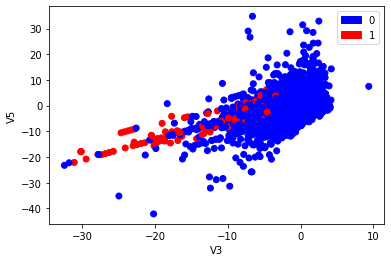

In [192]:
### I am picking features V3 and V5 respectively
import matplotlib.patches as mpatches
colormap = np.array(['blue', 'red'])
pop_a = mpatches.Patch(color='blue', label='0')
pop_b = mpatches.Patch(color='red', label='1')
plt.scatter(x = join_df['V3'], y = join_df['V5'], c=colormap[y_train])
plt.legend(handles=[pop_a,pop_b])
plt.xlabel("V3")
plt.ylabel("V5")
plt.show()

From the above graph, we can infer that most of the valid transaction data points are crowding into 1 big cluster.<br>
Hence, 1 gaussian component should be fine to fit the data

In [193]:
### Preparing the training set for the 2 features chosen
V3 = pd.DataFrame(X_train['V3'])
V5 = pd.DataFrame(X_train['V5'])
V3_V5 = V3.join(V5)

In [194]:
### Preparing the validation set for the 2 features chosen
V3_val = pd.DataFrame(X_val['V3'])
V5_val = pd.DataFrame(X_val['V5'])
V3_V5_val = V3_val.join(V5_val)

In [195]:
gm_3a = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
gm_3a.fit(V3_V5)

GaussianMixture(random_state=40)

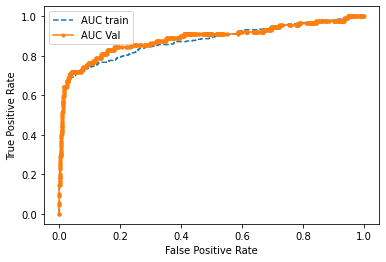

AUC of training set 0.874
AUC of validation set 0.887


In [196]:
p_V3_V5_train = gm_3a.score_samples(V3_V5)
p_V3_V5_val = gm_3a.score_samples(V3_V5_val)
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p_V3_V5_train)
fpr_gm, tpr_gm, _ = roc_curve(y_val, -1 * p_V3_V5_val)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='AUC train')
plt.plot(fpr_gm, tpr_gm, marker='.', label='AUC Val')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print ("AUC of training set" , format( auc(fpr_sc, tpr_sc) , ".3f"))
print ("AUC of validation set" , format( auc(fpr_gm, tpr_gm) , ".3f"))

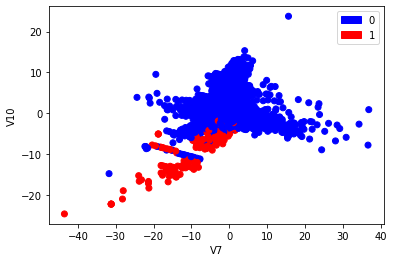

In [197]:
### I am picking features V7 and V10 respectively
import matplotlib.patches as mpatches
colormap = np.array(['blue', 'red'])
pop_a = mpatches.Patch(color='blue', label='0')
pop_b = mpatches.Patch(color='red', label='1')
plt.scatter(x = join_df['V7'], y = join_df['V10'], c=colormap[y_train])
plt.legend(handles=[pop_a,pop_b])
plt.xlabel("V7")
plt.ylabel("V10")
plt.show()

From the above graph, we can infer that most of the valid transaction data points are crowding into 1 big cluster.
Hence, 1 gaussian component should be fine to fit the data

In [198]:
### Preparing the training set for the 2 features chosen
V7 = pd.DataFrame(X_train['V7'])
V10 = pd.DataFrame(X_train['V10'])
V7_V10 = V7.join(V10)

In [199]:
### Preparing the validation set for the 2 features chosen
V7_val = pd.DataFrame(X_val['V7'])
V10_val = pd.DataFrame(X_val['V10'])
V7_V10_val = V7_val.join(V10_val)

In [200]:
gm_3a = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
gm_3a.fit(V7_V10)

GaussianMixture(random_state=40)

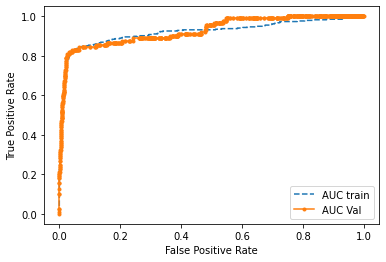

AUC of training set 0.921
AUC of validation set 0.928


In [201]:
p_V7_V10_train = gm_3a.score_samples(V7_V10)
p_V7_V10_val = gm_3a.score_samples(V7_V10_val)
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p_V7_V10_train)
fpr_gm, tpr_gm, _ = roc_curve(y_val, -1 * p_V7_V10_val)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='AUC train')
plt.plot(fpr_gm, tpr_gm, marker='.', label='AUC Val')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print ("AUC of training set" , format( auc(fpr_sc, tpr_sc) , ".3f"))
print ("AUC of validation set" , format( auc(fpr_gm, tpr_gm) , ".3f"))

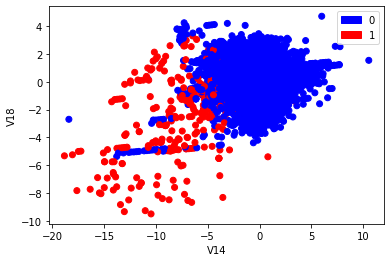

In [202]:
### I am picking features V14 and V18 respectively
import matplotlib.patches as mpatches
colormap = np.array(['blue', 'red'])
pop_a = mpatches.Patch(color='blue', label='0')
pop_b = mpatches.Patch(color='red', label='1')
plt.scatter(x = join_df['V14'], y = join_df['V18'], c=colormap[y_train])
plt.legend(handles=[pop_a,pop_b])
plt.xlabel("V14")
plt.ylabel("V18")
plt.show()

From the above graph, we can infer that most of the valid transaction data points are crowding into 1 big cluster.
Hence, 1 gaussian component should be fine to fit the data

In [203]:
### Preparing the training set for the 2 features chosen
V14 = pd.DataFrame(X_train['V14'])
V18 = pd.DataFrame(X_train['V18'])
V14_V18 = V14.join(V18)

In [204]:
### Preparing the validation set for the 2 features chosen
V14_val = pd.DataFrame(X_val['V14'])
V18_val = pd.DataFrame(X_val['V18'])
V14_V18_val = V14_val.join(V18_val)

In [205]:
gm_3a = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=40)
gm_3a.fit(V14_V18)

GaussianMixture(n_components=2, random_state=40)

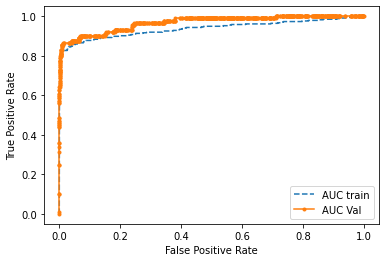

AUC of training set 0.937
AUC of validation set 0.967


In [206]:
p_V14_V18_train = gm_3a.score_samples(V14_V18)
p_V14_V18_val = gm_3a.score_samples(V14_V18_val)
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p_V14_V18_train)
fpr_gm, tpr_gm, _ = roc_curve(y_val, -1 * p_V14_V18_val)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='AUC train')
plt.plot(fpr_gm, tpr_gm, marker='.', label='AUC Val')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print ("AUC of training set" , format( auc(fpr_sc, tpr_sc) , ".3f"))
print ("AUC of validation set" , format( auc(fpr_gm, tpr_gm) , ".3f"))

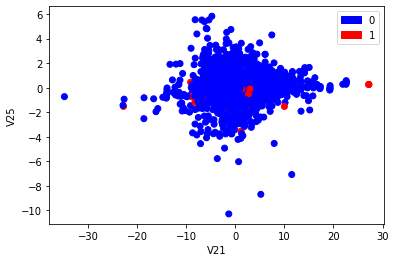

In [207]:
### I am picking features V24 and V26 respectively
import matplotlib.patches as mpatches
colormap = np.array(['blue', 'red'])
pop_a = mpatches.Patch(color='blue', label='0')
pop_b = mpatches.Patch(color='red', label='1')
plt.scatter(x = join_df['V21'], y = join_df['V25'], c=colormap[y_train])
plt.legend(handles=[pop_a,pop_b])
plt.xlabel("V21")
plt.ylabel("V25")
plt.show()

From the above graph, we can infer that most of the valid transaction data points are crowding into 1 big cluster.
Hence, 1 gaussian component should be fine to fit the data

In [208]:
### Preparing the training set for the 2 features chosen
V21 = pd.DataFrame(X_train['V21'])
V25 = pd.DataFrame(X_train['V25'])
V21_V25 = V21.join(V25)

In [209]:
### Preparing the validation set for the 2 features chosen
V21_val = pd.DataFrame(X_val['V21'])
V25_val = pd.DataFrame(X_val['V25'])
V21_V25_val = V21_val.join(V25_val)

In [210]:
gm_3a = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=40)
gm_3a.fit(V21_V25)

GaussianMixture(n_components=2, random_state=40)

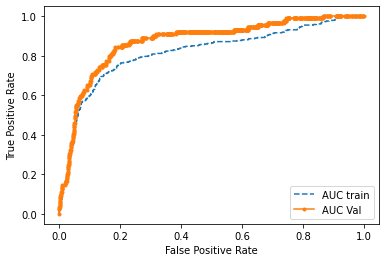

AUC of training set 0.817
AUC of validation set 0.873


In [211]:
p_V21_V25_train = gm_3a.score_samples(V21_V25)
p_V21_V25_val = gm_3a.score_samples(V21_V25_val)
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p_V21_V25_train)
fpr_gm, tpr_gm, _ = roc_curve(y_val, -1 * p_V21_V25_val)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='AUC train')
plt.plot(fpr_gm, tpr_gm, marker='.', label='AUC Val')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print ("AUC of training set" , format( auc(fpr_sc, tpr_sc) , ".3f"))
print ("AUC of validation set" , format( auc(fpr_gm, tpr_gm) , ".3f"))

**The best pair of feature of highest AUC on validation set is V14 and V18.**<br>
The validation AUC obtained is 0.967

In [212]:
g_m_3b = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=40)
g_m_3b.fit(V14_V18)
p_gm_train_3b = g_m_3b.score_samples(V14_V18)
p_gm_val_3b = g_m_3b.score_samples(V14_V18_val)

In [ ]:
sorted(p_gm_val_3b)

In [214]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [40, -30 , -28, -25, -20, -18, -16, -15, -14, -13, -10, -9, -8]:
   #precision = precision_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using precision
   #recall = recall_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, p_gm_val_3b < tr)
   print('For threshold of ',tr,' F1-score: ', '%.3f' % f1) 

Method 1: 
For threshold of  40  F1-score:  0.004
For threshold of  -30  F1-score:  0.315
For threshold of  -28  F1-score:  0.345
For threshold of  -25  F1-score:  0.414
For threshold of  -20  F1-score:  0.569
For threshold of  -18  F1-score:  0.594
For threshold of  -16  F1-score:  0.631
For threshold of  -15  F1-score:  0.654
For threshold of  -14  F1-score:  0.662
For threshold of  -13  F1-score:  0.659
For threshold of  -10  F1-score:  0.613
For threshold of  -9  F1-score:  0.528
For threshold of  -8  F1-score:  0.452


Thus the best threshold for the pair of feature V14 and V18 is -14.<br>
The F1-score obtained at this threshold is 0.662

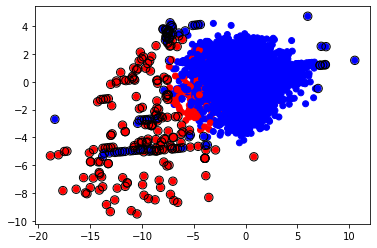

In [215]:
V14_V18_arr = V14_V18.to_numpy()
plt.scatter(V14_V18_arr[:,0], V14_V18_arr[:,1], c=colormap[y_train])
threshold = -14
outliers = np.nonzero(p_gm_train_3b<threshold)[0]
plt.scatter(V14_V18_arr[outliers,0], V14_V18_arr[outliers,1],marker="o",facecolor= "none",edgecolor="black",s=70)
plt.show()

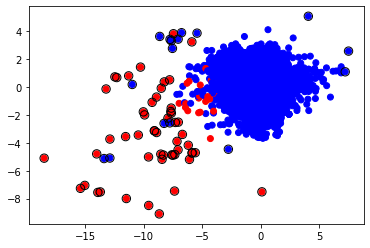

In [216]:
V14_V18_val_arr = V14_V18_val.to_numpy()
plt.scatter(V14_V18_val_arr[:,0], V14_V18_val_arr[:,1], c=colormap[y_val])
threshold = -14
outliers = np.nonzero(p_gm_val_3b<threshold)[0]
plt.scatter(V14_V18_val_arr[outliers,0], V14_V18_val_arr[outliers,1],marker="o",facecolor= "none",edgecolor="black",s=70)
plt.show()

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 

In [217]:
###You can use the following function for 3D plotting in part b  ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='b', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


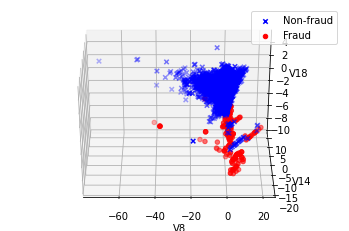

In [218]:
plot_3d(X_train, y_train, f1="V8", f2="V14", f3="V18", angle=270 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

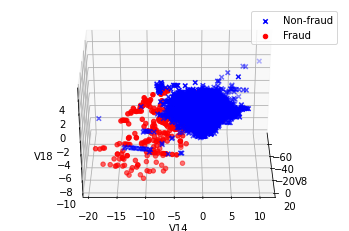

In [219]:
plot_3d(X_train, y_train, f1="V8", f2="V14", f3="V18", angle=360 )

In [220]:
### Preparing the training set for the 3 features chosen
V8 = pd.DataFrame(X_train['V8'])
V14 = pd.DataFrame(X_train['V14'])
V18 = pd.DataFrame(X_train['V18'])
V8_V14 = V8.join(V14)
V8_V14_V18 = V8_V14.join(V18)

In [221]:
### Preparing the validation set for the 2 features chosen
V8 = pd.DataFrame(X_val['V8'])
V14_val = pd.DataFrame(X_val['V14'])
V18_val = pd.DataFrame(X_val['V18'])
V8_V14_val = V8.join(V14_val)
V8_V14_V18_val = V8_V14_val.join(V18_val)

In [222]:
gm_3d = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=40)
gm_3d.fit(V8_V14_V18)

GaussianMixture(n_components=2, random_state=40)

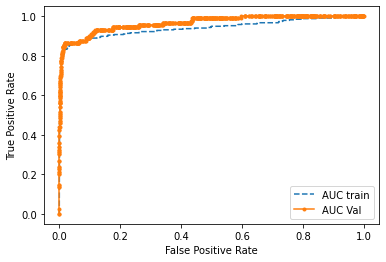

AUC of training set 0.940
AUC of validation set 0.966


In [223]:
p_V8_V14_V18_train = gm_3d.score_samples(V8_V14_V18)
p_V8_V14_V18_val = gm_3d.score_samples(V8_V14_V18_val)
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p_V8_V14_V18_train)
fpr_gm, tpr_gm, _ = roc_curve(y_val, -1 * p_V8_V14_V18_val)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='AUC train')
plt.plot(fpr_gm, tpr_gm, marker='.', label='AUC Val')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print ("AUC of training set" , format( auc(fpr_sc, tpr_sc) , ".3f"))
print ("AUC of validation set" , format( auc(fpr_gm, tpr_gm) , ".3f"))

In [224]:
p_gm_val_3d = gm_3d.score_samples(V8_V14_V18_val)

In [ ]:
sorted(p_gm_val_3d)

In [226]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [40, -30 , -28, -25, -20, -18, -16, -15, -14, -13, -10, -9, -8]:
   #precision = precision_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using precision
   #recall = recall_score(y_train, p_gm < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, p_gm_val_3d < tr)
   print('For threshold of ',tr,' F1-score: ', '%.3f' % f1) 

Method 1: 
For threshold of  40  F1-score:  0.004
For threshold of  -30  F1-score:  0.316
For threshold of  -28  F1-score:  0.325
For threshold of  -25  F1-score:  0.344
For threshold of  -20  F1-score:  0.454
For threshold of  -18  F1-score:  0.500
For threshold of  -16  F1-score:  0.494
For threshold of  -15  F1-score:  0.481
For threshold of  -14  F1-score:  0.502
For threshold of  -13  F1-score:  0.463
For threshold of  -10  F1-score:  0.285
For threshold of  -9  F1-score:  0.161
For threshold of  -8  F1-score:  0.074


The best threshold is -14 which yields an F1 score of 0.502

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). To start, consider $c$ in $[0,10]$ with steps of 0.1. You can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model using the existing AUC function from sklearn? Why? **[0.5]**

In [227]:
non_fraud = join_df[join_df['Class']==0]
fraud = join_df[join_df['Class']==1]

In [228]:
join_df_val = X_val.join(pd.DataFrame(y_val))
non_fraud_val = join_df_val[join_df_val['Class']==0]
fraud_val = join_df_val[join_df_val['Class']==1]

In [229]:
### Q) 1,2,3 Considering feature V14 since this feature had very good results in previous sections
G1_V14 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
G2_V14 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
G1_V14.fit(pd.DataFrame(non_fraud['V14']))
G2_V14.fit(pd.DataFrame(fraud['V14']))
S1_V14 = G1_V14.score_samples(pd.DataFrame(X_val['V14']))
S2_V14 = G2_V14.score_samples(pd.DataFrame(X_val['V14']))
print('The score samples S1 for G1 is ', S1_V14)
print('The score samples S2 for G2 is ', S2_V14)

The score samples S1 for G1 is  [-1.83485832 -0.89543181 -1.72208172 ... -0.91431199 -0.97442905
 -0.82613796]
The score samples S2 for G2 is  [-4.15275849 -3.77475142 -3.2296694  ... -3.790023   -3.45439007
 -3.69288634]


In [230]:
### To find optimal c and best F1 score for feature V14
f1_V14 = []
c_V14 = []
for c in np.arange(0,10,0.1):
  f1 = f1_score(y_val, S1_V14 < c * S2_V14 )
  f1_V14.append(f1)
  c_V14.append(c)

best_f1_score_V14 = max(f1_V14)
optimal_threshold_V14 = c_V14[f1_V14.index(best_f1_score_V14)]  
print('f1 scores ', f1_V14)
print('c values ', c_V14)
print('best f1 score value for V14 ', best_f1_score_V14)
print('The optimal c value for V14 ', optimal_threshold_V14)

f1 scores  [0.003669649115573331, 0.003669649115573331, 0.003669649115573331, 0.010472479298587432, 0.018254053473639, 0.02726227623583511, 0.03840682788051209, 0.05088566827697263, 0.0656964656964657, 0.08062015503875969, 0.09647495361781076, 0.10875706214689267, 0.12349639133921413, 0.13737734165923282, 0.15127701375245578, 0.16291532690246516, 0.18095238095238095, 0.1976592977893368, 0.20965517241379308, 0.22686567164179106, 0.24281150159744408, 0.26297577854671284, 0.2753623188405797, 0.28462998102466797, 0.31120331950207464, 0.33482142857142855, 0.352112676056338, 0.3712871287128713, 0.40106951871657753, 0.42735042735042733, 0.4437869822485207, 0.4672897196261683, 0.4918032786885246, 0.5119453924914675, 0.5263157894736843, 0.5415162454873647, 0.5501858736059478, 0.5563909774436091, 0.5658914728682171, 0.5748031496062992, 0.5887096774193549, 0.6008230452674896, 0.6075949367088608, 0.6068376068376069, 0.6200873362445415, 0.6283185840707965, 0.6513761467889908, 0.6542056074766355, 0.

In [231]:
### We need to find an optimal c for each feature
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
feature = []
f1_val_V = []
f1_train_V = []
c_V = []
best_f1_score_val = []
best_f1_score_train = []
optimal_threshold_val = []
optimal_threshold_train = []
for i in features:
  G1.fit(pd.DataFrame(non_fraud[i]))
  G2.fit(pd.DataFrame(fraud[i]))
  S1_val = G1.score_samples(pd.DataFrame(X_val[i]))
  S2_val = G2.score_samples(pd.DataFrame(X_val[i]))
  S1_train = G1.score_samples(pd.DataFrame(X_train[i]))
  S2_train = G2.score_samples(pd.DataFrame(X_train[i]))
  for c in np.arange(0,10,0.1):
    f1_val = f1_score(y_val, S1_val < c * S2_val)
    f1_val_V.append(f1_val)
    f1_train = f1_score(y_train, S1_train < c * S2_train)
    f1_train_V.append(f1_train)
    c_V.append(c)
  max_f1_score_val = max(f1_val_V)
  optimal_thresh_val = c_V[f1_val_V.index(max_f1_score_val)]
  best_f1_score_val.append(max_f1_score_val)
  optimal_threshold_val.append(optimal_thresh_val)
  max_f1_score_train = max(f1_train_V)
  optimal_thresh_train = c_V[f1_train_V.index(max_f1_score_train)]
  best_f1_score_train.append(max_f1_score_train)
  optimal_threshold_train.append(optimal_thresh_train)
  feature.append(i)
  f1_val_V.clear()
  f1_train_V.clear()
  c_V.clear()



In [232]:
f1_score_validation = np.around(np.array(best_f1_score_val),3)
threshold_validation = np.around(np.array(optimal_threshold_val),1)
feature_array = np.array(feature)
f1_score_validation_df = pd.DataFrame(f1_score_validation)
f1_score_validation_df.columns = ['Best validation F1 score']
threshold_validation_df = pd.DataFrame(threshold_validation)
threshold_validation_df.columns = ['Optimal validation threshold']
feature_df = pd.DataFrame(feature_array)
feature_df.columns = ['Features']
validation_df = f1_score_validation_df.join(threshold_validation_df)
validation_df = validation_df.join(feature_df)
validation_df.sort_values(by=['Best validation F1 score'],ascending=False)

,Best validation F1 score,Optimal validation threshold,Features
13,0.692,7.0,V14
16,0.686,5.9,V17
11,0.684,4.4,V12
10,0.653,3.6,V11
15,0.575,5.2,V16
8,0.457,3.4,V9
17,0.451,4.4,V18
9,0.397,6.8,V10
3,0.370,4.2,V4
2,0.311,7.6,V3


From the above table, it is evident that the best validation F1 score is 0.692<br>
The corresponding optimal threshold is 7<br>
The feature is V14

In [233]:
f1_score_train = np.around(np.array(best_f1_score_train),3)
threshold_train = np.around(np.array(optimal_threshold_train),1)
feature_array = np.array(feature)
f1_score_train_df = pd.DataFrame(f1_score_train)
f1_score_train_df.columns = ['Best train F1 score']
threshold_train_df = pd.DataFrame(threshold_train)
threshold_train_df.columns = ['Optimal train threshold']
feature_df = pd.DataFrame(feature_array)
feature_df.columns = ['Features']
train_df = f1_score_train_df.join(threshold_train_df)
train_df = train_df.join(feature_df)
train_df.sort_values(by=['Best train F1 score'],ascending=False)

,Best train F1 score,Optimal train threshold,Features
11,0.676,5.0,V12
16,0.639,7.3,V17
13,0.622,9.5,V14
10,0.581,3.6,V11
15,0.572,5.4,V16
17,0.427,5.1,V18
9,0.421,8.0,V10
8,0.406,3.3,V9
3,0.359,4.2,V4
2,0.277,7.9,V3


From the above table, it is evident that the best train F1 score is 0.676<br>
The corresponding optimal threshold is 5<br>
The feature is V12

In [234]:
#### To find the best f1 score, precison and recall of train set
c = 5
G1.fit(pd.DataFrame(non_fraud['V12']))
G2.fit(pd.DataFrame(fraud['V12']))
S1_train = G1.score_samples(pd.DataFrame(X_train['V12']))
S2_train = G2.score_samples(pd.DataFrame(X_train['V12']))
precision_train = precision_score(y_train, S1_train < c * S2_train) 
recall_train = recall_score(y_train, S1_train < c * S2_train)
print('For threshold of ',c,' \t best train precision: ', '%.3f' % precision_train,' \t best train recall: ', '%.3f' % recall_train) 


For threshold of  5  	 best train precision:  0.806  	 best train recall:  0.582


In [235]:
#### To find the best f1 score, precison and recall of validation set
c = 7
G1.fit(pd.DataFrame(non_fraud['V14']))
G2.fit(pd.DataFrame(fraud['V14']))
S1_val = G1.score_samples(pd.DataFrame(X_val['V14']))
S2_val = G2.score_samples(pd.DataFrame(X_val['V14']))
precision_val = precision_score(y_val, S1_val < c * S2_val) 
recall_val = recall_score(y_val, S1_val < c * S2_val)
print('For threshold of ',c,' \t best validation precision: ', '%.3f' % precision_val,' \t best validation recall: ', '%.3f' % recall_val) 

For threshold of  7  	 best validation precision:  0.677  	 best validation recall:  0.708


In [236]:
#### Checking if exisiting AUC function from sklearn works for this model
fpr_4, tpr_4, _ = roc_curve(y_val, -1 * S1_val<7*S2_val)
print ("AUC of validation set" , format( auc(fpr_4, tpr_4) , ".3f"))

AUC of validation set 0.500


When AUC=0.5, the classifier is not able to distinguish between Positive and Negative class points.<br>
Hence the existing AUC function from sklearn does not give any valuable insights regarding AUC score

# Conclusion<br>
**TRAIN SET:** <br>
Best Feature: V12<br>
Best F1 Score: 0.676<br>
Best Recall: 0.582<br>
Best Precision: 0.806<br>
Optimal Threshold: 5<br><br>
**VALIDATION SET:** <br>
Best Feature: V14<br>
Best F1 Score: 0.692<br>
Best Recall: 0.708<br>
Best Precision: 0.677<br>
Optimal Threshold: 7<br>




## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions? (Ans: Since fraud is rare and presumably different than normal transactions, the fraudulent transactions should exhibit the largest reconstruction error.)

# Model 1 : Two gaussian model with multiple features and single component for both classes

In [237]:
### Model 1 : Two gaussian model with multiple features and single component for both classes
### Considering two features V14 and V18 respectively.

non_fraud_train_1 = non_fraud[['V14', 'V18']]
fraud_train_1 = fraud[['V14','V18']]
#non_fraud_val_1 =  non_fraud_val[['V14','V18']]
#fraud_val_1 = fraud_val[['V14','V18']]

G1_model1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)    
G2_model1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
G1_model1.fit(non_fraud_train_1)
G2_model1.fit(fraud_train_1)
S1_model1 = G1_model1.score_samples(X_val[['V14','V18']])
S2_model1 = G2_model1.score_samples(X_val[['V14','V18']])
S1_model1_train = G1_model1.score_samples(X_train[['V14','V18']])
S2_model1_train = G2_model1.score_samples(X_train[['V14','V18']])

f1_model1 = []
c_model1 = []
f1_train_model1 = []
for c in np.arange(0,10,0.1):
  f1 = f1_score(y_val, S1_model1 < c * S2_model1 )
  f1_model1.append(f1)
  c_model1.append(c)
  f1_train = f1_score(y_train, S1_model1_train < c * S2_model1_train)
  f1_train_model1.append(f1_train)

best_f1_score_model1 = max(f1_model1)
optimal_threshold_model1= c_model1[f1_model1.index(best_f1_score_model1)]  
best_f1_score_model1_train = max(f1_train_model1)
optimal_threshold_model1_train= c_model1[f1_train_model1.index(best_f1_score_model1_train)]

print('best validation f1 score value for model1 ', best_f1_score_model1)
print('The optimal c value for model ', optimal_threshold_model1)

print('best train f1 score value for model1 ', best_f1_score_model1_train)
print('The optimal c value for model ', optimal_threshold_model1_train)


best validation f1 score value for model1  0.7065868263473053
The optimal c value for model  4.9
best train f1 score value for model1  0.6515580736543909
The optimal c value for model  4.3


In [238]:
c_val_model1 = 4.9
precision_val_model1 = precision_score(y_val, S1_model1 < c_val_model1 * S2_model1) 
recall_val_model1 = recall_score(y_val, S1_model1 < c_val_model1 * S2_model1)
print('For threshold of ',c_val_model1,' \t best validation precision: ', '%.3f' % precision_val_model1,' \t best validation recall: ', '%.3f' % recall_val_model1) 

c_train_model1 = 4.3
precision_train_model1 = precision_score(y_train, S1_model1_train < c_train_model1 * S2_model1_train) 
recall_train_model1 = recall_score(y_train, S1_model1_train < c_train_model1 * S2_model1_train)
print('For threshold of ',c_train_model1,' \t best train precision: ', '%.3f' % precision_train_model1,' \t\t best train recall: ', '%.3f' % recall_train_model1) 


For threshold of  4.9  	 best validation precision:  0.756  	 best validation recall:  0.663
For threshold of  4.3  	 best train precision:  0.620  		 best train recall:  0.687


# Model 2 : Two gaussian model, multiple features, single component for valid transactions and multiple components for fraudulent transactions

In [239]:
### Model 2 : Two gaussian model with multiple features and single comp for valid, 5 components for fraudulent data
### Considering two features V14 and V18 respectively.

non_fraud_train_1 = non_fraud[['V14', 'V18']]
fraud_train_1 = fraud[['V14','V18']]
#non_fraud_val_1 =  non_fraud_val[['V14','V18']]
#fraud_val_1 = fraud_val[['V14','V18']]

G1_model2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)    
G2_model2 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=40)
G1_model2.fit(non_fraud_train_1)
G2_model2.fit(fraud_train_1)
S1_model2 = G1_model2.score_samples(X_val[['V14','V18']])
S2_model2 = G2_model2.score_samples(X_val[['V14','V18']])
S1_model2_train = G1_model2.score_samples(X_train[['V14','V18']])
S2_model2_train = G2_model2.score_samples(X_train[['V14','V18']])

f1_model2 = []
c_model2 = []
f1_train_model2 = []
for c in np.arange(0,10,0.1):
  f1 = f1_score(y_val, S1_model2 < c * S2_model2 )
  f1_model2.append(f1)
  c_model2.append(c)
  f1_train = f1_score(y_train, S1_model2_train < c * S2_model2_train)
  f1_train_model2.append(f1_train)

best_f1_score_model2 = max(f1_model2)
optimal_threshold_model2= c_model2[f1_model2.index(best_f1_score_model2)]  
best_f1_score_model2_train = max(f1_train_model2)
optimal_threshold_model2_train= c_model2[f1_train_model2.index(best_f1_score_model2_train)]

print('best validation f1 score value for model2 ', best_f1_score_model2)
print('The optimal c value for model ', optimal_threshold_model2)

print('best train f1 score value for model2 ', best_f1_score_model2_train)
print('The optimal c value for model ', optimal_threshold_model2_train)


best validation f1 score value for model2  0.7106598984771575
The optimal c value for model  3.6
best train f1 score value for model2  0.6607669616519173
The optimal c value for model  4.9


In [240]:
c_val_model2 = 3.6
precision_val_model2 = precision_score(y_val, S1_model2 < c_val_model2 * S2_model2) 
recall_val_model2 = recall_score(y_val, S1_model2 < c_val_model2 * S2_model2)
print('For threshold of ',c_val_model2,' \t best validation precision: ', '%.3f' % precision_val_model2,' \t best validation recall: ', '%.3f' % recall_val_model2) 

c_train_model2 = 4.9
precision_train_model2 = precision_score(y_train, S1_model2_train < c_train_model2 * S2_model2_train) 
recall_train_model2 = recall_score(y_train, S1_model2_train < c_train_model2* S2_model2_train)
print('For threshold of ',c_train_model2,' \t best train precision: ', '%.3f' % precision_train_model2,' \t\t best train recall: ', '%.3f' % recall_train_model2) 


For threshold of  3.6  	 best validation precision:  0.648  	 best validation recall:  0.787
For threshold of  4.9  	 best train precision:  0.653  		 best train recall:  0.669


# Model 3 : Two gaussian model, all features, single component for both classes

In [241]:
non_fraud = non_fraud.drop(['Class'],axis=1)
fraud = fraud.drop(['Class'],axis=1)

In [242]:
### Model 3 : Two gaussian model with all features, 1 component for both classes

non_fraud_train_1 = non_fraud
fraud_train_1 = fraud
#non_fraud_val_1 =  non_fraud_val[['V14','V18']]
#fraud_val_1 = fraud_val[['V14','V18']]

G1_model3 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)    
G2_model3 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
G1_model3.fit(non_fraud_train_1)
G2_model3.fit(fraud_train_1)
S1_model3 = G1_model3.score_samples(X_val)
S2_model3 = G2_model3.score_samples(X_val)
S1_model3_train = G1_model3.score_samples(X_train)
S2_model3_train = G2_model3.score_samples(X_train)

f1_model3 = []
c_model3 = []
f1_train_model3 = []
for c in np.arange(0,10,0.1):
  f1 = f1_score(y_val, S1_model3 < c * S2_model3 )
  f1_model3.append(f1)
  c_model3.append(c)
  f1_train = f1_score(y_train, S1_model3_train < c * S2_model3_train)
  f1_train_model3.append(f1_train)

best_f1_score_model3 = max(f1_model3)
optimal_threshold_model3= c_model3[f1_model3.index(best_f1_score_model3)]  
best_f1_score_model3_train = max(f1_train_model3)
optimal_threshold_model3_train= c_model3[f1_train_model3.index(best_f1_score_model3_train)]

print('best validation f1 score value for model3 ', best_f1_score_model3)
print('The optimal c value for model ', optimal_threshold_model3)

print('best train f1 score value for model3 ', best_f1_score_model3_train)
print('The optimal c value for model ', optimal_threshold_model3_train)


best validation f1 score value for model3  0.7608695652173914
The optimal c value for model  4.7
best train f1 score value for model3  0.7149187592319055
The optimal c value for model  5.2


In [243]:
c_val_model3 = 4.7
precision_val_model3 = precision_score(y_val, S1_model3 < c_val_model3 * S2_model3) 
recall_val_model3 = recall_score(y_val, S1_model3 < c_val_model3 * S2_model3)
print('For threshold of ',c_val_model3,' \t best validation precision: ', '%.3f' % precision_val_model3,' \t best validation recall: ', '%.3f' % recall_val_model3) 

c_train_model3 = 5.2
precision_train_model3 = precision_score(y_train, S1_model3_train < c_train_model3 * S2_model3_train) 
recall_train_model3 = recall_score(y_train, S1_model3_train < c_train_model3 * S2_model3_train)
print('For threshold of ',c_train_model3,' \t best train precision: ', '%.3f' % precision_train_model3,' \t\t best train recall: ', '%.3f' % recall_train_model3) 


For threshold of  4.7  	 best validation precision:  0.737  	 best validation recall:  0.787
For threshold of  5.2  	 best train precision:  0.708  		 best train recall:  0.722


# Model 4 : Two gaussian model, all features, single component for valid transactions and multiple components for fraudulent transactions

In [244]:
### Model 4 : Two gaussian model with all features, 1 component for vaid class and 5 components for fraudulent class

non_fraud_train_1 = non_fraud
fraud_train_1 = fraud
#non_fraud_val_1 =  non_fraud_val[['V14','V18']]
#fraud_val_1 = fraud_val[['V14','V18']]

G1_model4 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)    
G2_model4 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=40)
G1_model4.fit(non_fraud_train_1)
G2_model4.fit(fraud_train_1)
S1_model4 = G1_model4.score_samples(X_val)
S2_model4 = G2_model4.score_samples(X_val)
S1_model4_train = G1_model4.score_samples(X_train)
S2_model4_train = G2_model4.score_samples(X_train)

f1_model4 = []
c_model4 = []
f1_train_model4 = []
for c in np.arange(0,10,0.1):
  f1 = f1_score(y_val, S1_model4 < c * S2_model4 )
  f1_model4.append(f1)
  c_model4.append(c)
  f1_train = f1_score(y_train, S1_model4_train < c * S2_model4_train)
  f1_train_model4.append(f1_train)

best_f1_score_model4 = max(f1_model4)
optimal_threshold_model4= c_model4[f1_model4.index(best_f1_score_model4)]  
best_f1_score_model4_train = max(f1_train_model4)
optimal_threshold_model4_train= c_model4[f1_train_model4.index(best_f1_score_model4_train)]

print('best validation f1 score value for model4 ', best_f1_score_model4)
print('The optimal c value for model ', optimal_threshold_model4)

print('best train f1 score value for model4 ', best_f1_score_model4_train)
print('The optimal c value for model ', optimal_threshold_model4_train)


best validation f1 score value for model4  0.7950310559006211
The optimal c value for model  6.1000000000000005
best train f1 score value for model4  0.8042488619119877
The optimal c value for model  5.1000000000000005


In [245]:
c_val_model4 = 6.1
precision_val_model4 = precision_score(y_val, S1_model4 < c_val_model4 * S2_model4) 
recall_val_model4 = recall_score(y_val, S1_model4 < c_val_model4 * S2_model4)
print('For threshold of ',c_val_model4,' \t best validation precision: ', '%.3f' % precision_val_model4,' \t best validation recall: ', '%.3f' % recall_val_model4) 

c_train_model4 = 5.1
precision_train_model4 = precision_score(y_train, S1_model4_train < c_train_model4 * S2_model4_train) 
recall_train_model4 = recall_score(y_train, S1_model4_train < c_train_model4 * S2_model4_train)
print('For threshold of ',c_train_model4,' \t best train precision: ', '%.3f' % precision_train_model4,' \t\t best train recall: ', '%.3f' % recall_train_model4) 


For threshold of  6.1  	 best validation precision:  0.889  	 best validation recall:  0.719
For threshold of  5.1  	 best train precision:  0.818  		 best train recall:  0.791


# Model 5 : Two gaussian model, all features, single component for valid transactions and multiple components for fraudulent transactions. In this case, the number of components for fraudulent transactions in increased to 8

In [246]:
### Model 5 : Two gaussian model with all features, 1 component for vaid class and 8 components for fraudulent class

non_fraud_train_1 = non_fraud
fraud_train_1 = fraud
#non_fraud_val_1 =  non_fraud_val[['V14','V18']]
#fraud_val_1 = fraud_val[['V14','V18']]

G1_model5 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)    
G2_model5 = GaussianMixture(n_components = 8, covariance_type = 'full', random_state=40)
G1_model5.fit(non_fraud_train_1)
G2_model5.fit(fraud_train_1)
S1_model5 = G1_model5.score_samples(X_val)
S2_model5 = G2_model5.score_samples(X_val)
S1_model5_train = G1_model5.score_samples(X_train)
S2_model5_train = G2_model5.score_samples(X_train)

f1_model5 = []
c_model5 = []
f1_train_model5 = []
for c in np.arange(0,10,0.1):
  f1 = f1_score(y_val, S1_model5 < c * S2_model5 )
  f1_model5.append(f1)
  c_model5.append(c)
  f1_train = f1_score(y_train, S1_model5_train < c * S2_model5_train)
  f1_train_model5.append(f1_train)

best_f1_score_model5 = max(f1_model5)
optimal_threshold_model5= c_model5[f1_model5.index(best_f1_score_model5)]  
best_f1_score_model5_train = max(f1_train_model5)
optimal_threshold_model5_train= c_model5[f1_train_model5.index(best_f1_score_model5_train)]

print('best validation f1 score value for model5 ', best_f1_score_model5)
print('The optimal c value for model ', optimal_threshold_model5)

print('best train f1 score value for model5 ', best_f1_score_model5_train)
print('The optimal c value for model ', optimal_threshold_model5_train)


best validation f1 score value for model5  0.8121212121212121
The optimal c value for model  3.8000000000000003
best train f1 score value for model5  0.8536209553158705
The optimal c value for model  5.2


In [247]:
c_val_model5 = 3.8
precision_val_model5 = precision_score(y_val, S1_model5 < c_val_model5 * S2_model5) 
recall_val_model5 = recall_score(y_val, S1_model5 < c_val_model5 * S2_model5)
print('For threshold of ',c_val_model5,' \t best validation precision: ', '%.3f' % precision_val_model5,' \t best validation recall: ', '%.3f' % recall_val_model5) 

c_train_model5 = 5.2
precision_train_model5 = precision_score(y_train, S1_model5_train < c_train_model5 * S2_model5_train) 
recall_train_model5 = recall_score(y_train, S1_model5_train < c_train_model5 * S2_model5_train)
print('For threshold of ',c_train_model5,' \t best train precision: ', '%.3f' % precision_train_model5,' \t\t best train recall: ', '%.3f' % recall_train_model5) 


For threshold of  3.8  	 best validation precision:  0.882  	 best validation recall:  0.753
For threshold of  5.2  	 best train precision:  0.882  		 best train recall:  0.827


It can be verified that, increasing the number of components of fraudulent transactions from 5 to 8 increases the F1-score, precision and recall. 

# Model 6 : One gaussian model with all the features, single component and both classes

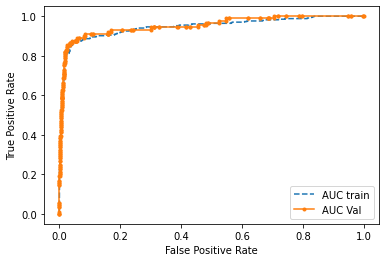

AUC of training set 0.947
AUC of validation set 0.953


In [248]:
gm_model6 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
gm_model6.fit(X_train)

p_train_model6 = gm_model6.score_samples(X_train)
p_val_model6 = gm_model6.score_samples(X_val)
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p_train_model6)
fpr_gm, tpr_gm, _ = roc_curve(y_val, -1 * p_val_model6)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='AUC train')
plt.plot(fpr_gm, tpr_gm, marker='.', label='AUC Val')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print ("AUC of training set" , format( auc(fpr_sc, tpr_sc) , ".3f"))
print ("AUC of validation set" , format( auc(fpr_gm, tpr_gm) , ".3f"))

In [ ]:
sorted(p_val_model6)

In [250]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-1500, -900, -800, -700, -600, -500, -400, -300, -200, -100]:
   precision_val_model6 = precision_score(y_val, p_val_model6 < tr) #Here, we compare y_train labels to our picks using precision
   recall_val_model6 = recall_score(y_val, p_val_model6 < tr) #Here, we compare y_train labels to our picks using recall
   f1_val_model6 = f1_score(y_val, p_val_model6 < tr)
   print('For threshold of ',tr,' \t val precision: ', '%.3f' % precision_val_model6,' \t val recall: ', '%.3f' % recall_val_model6,' \t f1 score: ', '%.3f' % f1_val_model6) 

Method 1: 
For threshold of  -1500  	 val precision:  0.167  	 val recall:  0.034  	 f1 score:  0.056
For threshold of  -900  	 val precision:  0.361  	 val recall:  0.146  	 f1 score:  0.208
For threshold of  -800  	 val precision:  0.395  	 val recall:  0.191  	 f1 score:  0.258
For threshold of  -700  	 val precision:  0.327  	 val recall:  0.202  	 f1 score:  0.250
For threshold of  -600  	 val precision:  0.281  	 val recall:  0.202  	 f1 score:  0.235
For threshold of  -500  	 val precision:  0.240  	 val recall:  0.202  	 f1 score:  0.220
For threshold of  -400  	 val precision:  0.198  	 val recall:  0.236  	 f1 score:  0.215
For threshold of  -300  	 val precision:  0.181  	 val recall:  0.315  	 f1 score:  0.230
For threshold of  -200  	 val precision:  0.133  	 val recall:  0.449  	 f1 score:  0.206
For threshold of  -100  	 val precision:  0.073  	 val recall:  0.820  	 f1 score:  0.135


In [251]:
### Model 6
precision_val_model6 = 0.395   ### Best Val precision
recall_val_model6 = 0.191      ### Best val recall
f1_val_model6 = 0.258          ### Best F1 score 

In [ ]:
sorted(p_train_model6)

In [253]:
print ("Method 1: ")

for tr in [-1500, -900, -800, -700, -600, -500, -400, -300, -200, -100]:
   precision_train_model6 = precision_score(y_train, p_train_model6 < tr) #Here, we compare y_train labels to our picks using precision
   recall_train_model6 = recall_score(y_train, p_train_model6 < tr) #Here, we compare y_train labels to our picks using recall
   f1_train_model6 = f1_score(y_train, p_train_model6 < tr)
   print('For threshold of ',tr,' \t train precision: ', '%.3f' % precision_train_model6,' \t train recall: ', '%.3f' % recall_train_model6,' \t f1 score: ', '%.3f' % f1_train_model6) 

Method 1: 
For threshold of  -1500  	 train precision:  0.140  	 train recall:  0.024  	 f1 score:  0.041
For threshold of  -900  	 train precision:  0.362  	 train recall:  0.161  	 f1 score:  0.223
For threshold of  -800  	 train precision:  0.356  	 train recall:  0.206  	 f1 score:  0.261
For threshold of  -700  	 train precision:  0.321  	 train recall:  0.224  	 f1 score:  0.264
For threshold of  -600  	 train precision:  0.253  	 train recall:  0.224  	 f1 score:  0.237
For threshold of  -500  	 train precision:  0.220  	 train recall:  0.227  	 f1 score:  0.224
For threshold of  -400  	 train precision:  0.204  	 train recall:  0.266  	 f1 score:  0.231
For threshold of  -300  	 train precision:  0.160  	 train recall:  0.304  	 f1 score:  0.210
For threshold of  -200  	 train precision:  0.120  	 train recall:  0.439  	 f1 score:  0.189
For threshold of  -100  	 train precision:  0.065  	 train recall:  0.764  	 f1 score:  0.120


In [254]:
precision_train_model6 = 0.321   ### Best Val precision
recall_train_model6 = 0.224      ### Best val recall
f1_train_model6 = 0.264          ### Best F1 score 

# Model 7 : One gaussian model with all the features, multiple components and both classes

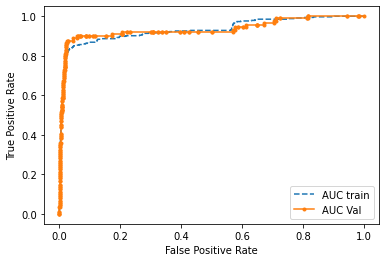

AUC of training set 0.932
AUC of validation set 0.935


In [255]:
gm_model7 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=40)
gm_model7.fit(X_train)

p_train_model7 = gm_model7.score_samples(X_train)
p_val_model7 = gm_model7.score_samples(X_val)
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p_train_model7)
fpr_gm, tpr_gm, _ = roc_curve(y_val, -1 * p_val_model7)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='AUC train')
plt.plot(fpr_gm, tpr_gm, marker='.', label='AUC Val')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print ("AUC of training set" , format( auc(fpr_sc, tpr_sc) , ".3f"))
print ("AUC of validation set" , format( auc(fpr_gm, tpr_gm) , ".3f"))

In [ ]:
sorted(p_val_model7)

In [257]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-300, -200, -180, -140, -130, -120, -110, -100, -90, -80, -70, -60]:
   precision = precision_score(y_val, p_val_model7 < tr) #Here, we compare y_train labels to our picks using precision
   recall = recall_score(y_val, p_val_model7 < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, p_val_model7 < tr)
   print('For threshold of ',tr,' \t val precision: ', '%.3f' % precision,' \t val recall: ', '%.3f' % recall,' \t f1 score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -300  	 val precision:  0.000  	 val recall:  0.000  	 f1 score:  0.000
For threshold of  -200  	 val precision:  0.000  	 val recall:  0.000  	 f1 score:  0.000
For threshold of  -180  	 val precision:  0.000  	 val recall:  0.000  	 f1 score:  0.000
For threshold of  -140  	 val precision:  0.000  	 val recall:  0.000  	 f1 score:  0.000
For threshold of  -130  	 val precision:  0.034  	 val recall:  0.011  	 f1 score:  0.017
For threshold of  -120  	 val precision:  0.075  	 val recall:  0.034  	 f1 score:  0.047
For threshold of  -110  	 val precision:  0.069  	 val recall:  0.045  	 f1 score:  0.054
For threshold of  -100  	 val precision:  0.081  	 val recall:  0.067  	 f1 score:  0.074
For threshold of  -90  	 val precision:  0.120  	 val recall:  0.146  	 f1 score:  0.132
For threshold of  -80  	 val precision:  0.149  	 val recall:  0.337  	 f1 score:  0.206
For threshold of  -70  	 val precision:  0.088  	 val recall:  0.607  	 f1 score:  0.153
Fo

In [258]:
precision_val_model7 = 0.149   ### Best Val precision
recall_val_model7 = 0.337      ### Best val recall
f1_val_model7 = 0.206          ### Best F1 score 

In [ ]:
sorted(p_train_model7)

In [260]:
print ("Method 1: ")

for tr in [-300, -200, -180, -140, -130, -120, -110, -100, -90, -80, -70, -60]:
   precision = precision_score(y_train, p_train_model7 < tr) #Here, we compare y_train labels to our picks using precision
   recall = recall_score(y_train, p_train_model7 < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_train, p_train_model7 < tr)
   print('For threshold of ',tr,' \t train precision: ', '%.3f' % precision,' \t train recall: ', '%.3f' % recall,' \t f1 score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -300  	 train precision:  0.000  	 train recall:  0.000  	 f1 score:  0.000
For threshold of  -200  	 train precision:  0.000  	 train recall:  0.000  	 f1 score:  0.000
For threshold of  -180  	 train precision:  0.016  	 train recall:  0.003  	 f1 score:  0.005
For threshold of  -140  	 train precision:  0.009  	 train recall:  0.003  	 f1 score:  0.005
For threshold of  -130  	 train precision:  0.008  	 train recall:  0.003  	 f1 score:  0.004
For threshold of  -120  	 train precision:  0.059  	 train recall:  0.030  	 f1 score:  0.040
For threshold of  -110  	 train precision:  0.050  	 train recall:  0.033  	 f1 score:  0.040
For threshold of  -100  	 train precision:  0.052  	 train recall:  0.048  	 f1 score:  0.050
For threshold of  -90  	 train precision:  0.135  	 train recall:  0.191  	 f1 score:  0.158
For threshold of  -80  	 train precision:  0.146  	 train recall:  0.358  	 f1 score:  0.208
For threshold of  -70  	 train precision:  0.081  	

In [261]:
precision_train_model7 = 0.146   ### Best Val precision
recall_train_model7 = 0.358      ### Best val recall
f1_train_model7 = 0.208          ### Best F1 score 

# Model 8 : One gaussian model, all features, single component, fitting on non-fraudulent transactions only

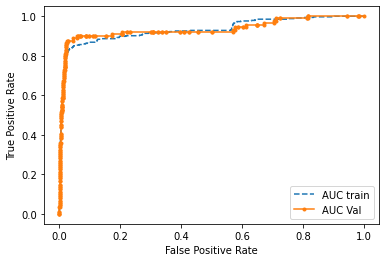

AUC of training set 0.932
AUC of validation set 0.935


In [262]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
auc_train=[]
auc_val=[]
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
gm.fit(X_train_new)
p = gm.score_samples(X_train)
q = gm.score_samples(X_val)
fpr_sc_train, tpr_sc_train, _ = roc_curve(y_train, -1 * p)
fpr_sc_val, tpr_sc_val, _ = roc_curve(y_val, -1 * q)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='AUC train')
plt.plot(fpr_gm, tpr_gm, marker='.', label='AUC Val')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print ("AUC of training set" , format( auc(fpr_sc, tpr_sc) , ".3f"))
print ("AUC of validation set" , format( auc(fpr_gm, tpr_gm) , ".3f"))


In [ ]:
sorted(q)

In [264]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-1500, -900, -800, -750, -700, -600, -500, -400, -300, -200]:
   precision = precision_score(y_val, q < tr) #Here, we compare y_train labels to our picks using precision
   recall = recall_score(y_val, q < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, q < tr)
   print('For threshold of ',tr,' \t val precision: ', '%.3f' % precision,' \t val recall: ', '%.3f' % recall,' \t f1 score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -1500  	 val precision:  0.609  	 val recall:  0.315  	 f1 score:  0.415
For threshold of  -900  	 val precision:  0.569  	 val recall:  0.416  	 f1 score:  0.481
For threshold of  -800  	 val precision:  0.552  	 val recall:  0.416  	 f1 score:  0.474
For threshold of  -750  	 val precision:  0.538  	 val recall:  0.472  	 f1 score:  0.503
For threshold of  -700  	 val precision:  0.529  	 val recall:  0.517  	 f1 score:  0.523
For threshold of  -600  	 val precision:  0.495  	 val recall:  0.528  	 f1 score:  0.511
For threshold of  -500  	 val precision:  0.445  	 val recall:  0.551  	 f1 score:  0.492
For threshold of  -400  	 val precision:  0.363  	 val recall:  0.596  	 f1 score:  0.451
For threshold of  -300  	 val precision:  0.343  	 val recall:  0.787  	 f1 score:  0.478
For threshold of  -200  	 val precision:  0.211  	 val recall:  0.809  	 f1 score:  0.334


In [265]:
precision_val_model8 = 0.529   ### Best Val precision
recall_val_model8 = 0.517      ### Best val recall
f1_val_model8 = 0.523          ### Best F1 score 

In [ ]:
sorted(p)

In [267]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-1500, -900, -800, -750, -700, -600, -500, -400, -300, -200]:
   precision = precision_score(y_train, p < tr) #Here, we compare y_train labels to our picks using precision
   recall = recall_score(y_train, p < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_train, p < tr)
   print('For threshold of ',tr,' \t train precision: ', '%.3f' % precision,' \t train recall: ', '%.3f' % recall,' \t f1 score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -1500  	 train precision:  0.582  	 train recall:  0.296  	 f1 score:  0.392
For threshold of  -900  	 train precision:  0.517  	 train recall:  0.406  	 f1 score:  0.455
For threshold of  -800  	 train precision:  0.472  	 train recall:  0.406  	 f1 score:  0.437
For threshold of  -750  	 train precision:  0.466  	 train recall:  0.427  	 f1 score:  0.445
For threshold of  -700  	 train precision:  0.463  	 train recall:  0.481  	 f1 score:  0.471
For threshold of  -600  	 train precision:  0.422  	 train recall:  0.519  	 f1 score:  0.466
For threshold of  -500  	 train precision:  0.379  	 train recall:  0.540  	 f1 score:  0.445
For threshold of  -400  	 train precision:  0.347  	 train recall:  0.600  	 f1 score:  0.439
For threshold of  -300  	 train precision:  0.303  	 train recall:  0.734  	 f1 score:  0.429
For threshold of  -200  	 train precision:  0.191  	 train recall:  0.782  	 f1 score:  0.307


In [268]:
precision_train_model8 = 0.463   ### Best Val precision
recall_train_model8 = 0.481      ### Best val recall
f1_train_model8 = 0.471          ### Best F1 score 

# Model 9 : One gaussian model, even number features, single component, fitting on non-fraudulent transactions only

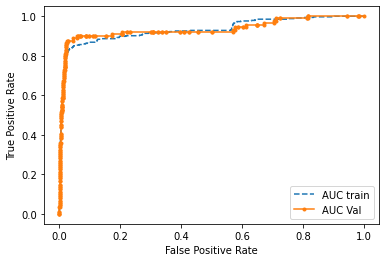

AUC of training set 0.932
AUC of validation set 0.935


In [269]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
auc_train=[]
auc_val=[]
gm_model9 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)
gm_model9.fit(X_train_new[['V2', 'V4','V6','V8','V10','V12','V14','V16', 'V18','V20','V22','V24','V26','V28']])
p_model9 = gm_model9.score_samples(X_train[['V2', 'V4','V6','V8','V10','V12','V14','V16', 'V18','V20','V22','V24','V26','V28']])
q_model9 = gm_model9.score_samples(X_val[['V2', 'V4','V6','V8','V10','V12','V14','V16', 'V18','V20','V22','V24','V26','V28']])
fpr_sc_train, tpr_sc_train, _ = roc_curve(y_train, -1 * p_model9)
fpr_sc_val, tpr_sc_val, _ = roc_curve(y_val, -1 * q_model9)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='AUC train')
plt.plot(fpr_gm, tpr_gm, marker='.', label='AUC Val')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print ("AUC of training set" , format( auc(fpr_sc, tpr_sc) , ".3f"))
print ("AUC of validation set" , format( auc(fpr_gm, tpr_gm) , ".3f"))


In [ ]:
sorted(q_model9)

In [271]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-600, -300, -200, -180, -100, -80, -70, -60, -50, -40]:
   precision = precision_score(y_val, q_model9 < tr) #Here, we compare y_train labels to our picks using precision
   recall = recall_score(y_val, q_model9 < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_val, q_model9 < tr)
   print('For threshold of ',tr,' \t val precision: ', '%.3f' % precision,' \t val recall: ', '%.3f' % recall,' \t f1 score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -600  	 val precision:  0.448  	 val recall:  0.146  	 f1 score:  0.220
For threshold of  -300  	 val precision:  0.365  	 val recall:  0.258  	 f1 score:  0.303
For threshold of  -200  	 val precision:  0.358  	 val recall:  0.382  	 f1 score:  0.370
For threshold of  -180  	 val precision:  0.336  	 val recall:  0.416  	 f1 score:  0.372
For threshold of  -100  	 val precision:  0.235  	 val recall:  0.607  	 f1 score:  0.339
For threshold of  -80  	 val precision:  0.176  	 val recall:  0.663  	 f1 score:  0.278
For threshold of  -70  	 val precision:  0.158  	 val recall:  0.742  	 f1 score:  0.260
For threshold of  -60  	 val precision:  0.126  	 val recall:  0.764  	 f1 score:  0.216
For threshold of  -50  	 val precision:  0.104  	 val recall:  0.831  	 f1 score:  0.185
For threshold of  -40  	 val precision:  0.077  	 val recall:  0.854  	 f1 score:  0.142


In [272]:
precision_val_model9 = 0.336   ### Best Val precision
recall_val_model9 = 0.416      ### Best val recall
f1_val_model9 = 0.372          ### Best F1 score 

In [ ]:
sorted(p_model9)

In [274]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ("Method 1: ")

for tr in [-3000, -2000, -1000, -600, -300, -200, -180, -100, -80, -70, -60, -50, -40]:
   precision = precision_score(y_train, p_model9 < tr) #Here, we compare y_train labels to our picks using precision
   recall = recall_score(y_train, p_model9 < tr) #Here, we compare y_train labels to our picks using recall
   f1 = f1_score(y_train, p_model9 < tr)
   print('For threshold of ',tr,' \t train precision: ', '%.3f' % precision,' \t train recall: ', '%.3f' % recall,' \t f1 score: ', '%.3f' % f1) 

Method 1: 
For threshold of  -3000  	 train precision:  0.000  	 train recall:  0.000  	 f1 score:  0.000
For threshold of  -2000  	 train precision:  0.000  	 train recall:  0.000  	 f1 score:  0.000
For threshold of  -1000  	 train precision:  0.038  	 train recall:  0.003  	 f1 score:  0.006
For threshold of  -600  	 train precision:  0.532  	 train recall:  0.173  	 f1 score:  0.261
For threshold of  -300  	 train precision:  0.354  	 train recall:  0.278  	 f1 score:  0.311
For threshold of  -200  	 train precision:  0.315  	 train recall:  0.367  	 f1 score:  0.339
For threshold of  -180  	 train precision:  0.302  	 train recall:  0.400  	 f1 score:  0.344
For threshold of  -100  	 train precision:  0.195  	 train recall:  0.585  	 f1 score:  0.293
For threshold of  -80  	 train precision:  0.151  	 train recall:  0.642  	 f1 score:  0.245
For threshold of  -70  	 train precision:  0.136  	 train recall:  0.719  	 f1 score:  0.228
For threshold of  -60  	 train precision:  0.116

In [275]:
precision_train_model9 = 0.302   ### Best Val precision
recall_train_model9 = 0.400      ### Best val recall
f1_train_model9 = 0.344          ### Best F1 score 

# Model 10 : Two gaussian model, even number of features, single component for valid transactions and multiple components for fraudulent transactions. In this case, the number of components for fraudulent transactions is 8

In [276]:
### Model 10 : Two gaussian model with even features, 1 component for vaid class and 8 components for fraudulent class

non_fraud_train_1 = non_fraud
fraud_train_1 = fraud
#non_fraud_val_1 =  non_fraud_val[['V14','V18']]
#fraud_val_1 = fraud_val[['V14','V18']]

G1_model10 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)    
G2_model10 = GaussianMixture(n_components = 8, covariance_type = 'full', random_state=40)
G1_model10.fit(non_fraud_train_1[['V2', 'V4','V6','V8','V10','V12','V14','V16', 'V18','V20','V22','V24','V26','V28']])
G2_model10.fit(fraud_train_1[['V2', 'V4','V6','V8','V10','V12','V14','V16', 'V18','V20','V22','V24','V26','V28']])
S1_model10 = G1_model10.score_samples(X_val[['V2', 'V4','V6','V8','V10','V12','V14','V16', 'V18','V20','V22','V24','V26','V28']])
S2_model10 = G2_model10.score_samples(X_val[['V2', 'V4','V6','V8','V10','V12','V14','V16', 'V18','V20','V22','V24','V26','V28']])
S1_model10_train = G1_model10.score_samples(X_train[['V2', 'V4','V6','V8','V10','V12','V14','V16', 'V18','V20','V22','V24','V26','V28']])
S2_model10_train = G2_model10.score_samples(X_train[['V2', 'V4','V6','V8','V10','V12','V14','V16', 'V18','V20','V22','V24','V26','V28']])

f1_model10 = []
c_model10 = []
f1_train_model10 = []
for c in np.arange(0,10,0.1):
  f1 = f1_score(y_val, S1_model10 < c * S2_model10 )
  f1_model10.append(f1)
  c_model10.append(c)
  f1_train = f1_score(y_train, S1_model10_train < c * S2_model10_train)
  f1_train_model10.append(f1_train)

best_f1_score_model10 = max(f1_model10)
optimal_threshold_model10= c_model10[f1_model10.index(best_f1_score_model10)]  
best_f1_score_model10_train = max(f1_train_model10)
optimal_threshold_model10_train= c_model10[f1_train_model10.index(best_f1_score_model10_train)]

print('best validation f1 score value for model10 ', best_f1_score_model10)
print('The optimal c value for model ', optimal_threshold_model10)

print('best train f1 score value for model10 ', best_f1_score_model10_train)
print('The optimal c value for model ', optimal_threshold_model10_train)


best validation f1 score value for model10  0.7865168539325842
The optimal c value for model  3.3000000000000003
best train f1 score value for model10  0.7538461538461538
The optimal c value for model  3.6


In [277]:
c_val_model10 = 3.3
precision_val_model10 = precision_score(y_val, S1_model10 < c_val_model10 * S2_model10) 
recall_val_model10 = recall_score(y_val, S1_model10 < c_val_model10 * S2_model10)
print('For threshold of ',c_val_model10,' \t best validation precision: ', '%.3f' % precision_val_model10,' \t best validation recall: ', '%.3f' % recall_val_model10) 

c_train_model10 = 3.6
precision_train_model10 = precision_score(y_train, S1_model10_train < c_train_model10 * S2_model10_train) 
recall_train_model10 = recall_score(y_train, S1_model10_train < c_train_model10 * S2_model10_train)
print('For threshold of ',c_train_model10,' \t best train precision: ', '%.3f' % precision_train_model10,' \t\t best train recall: ', '%.3f' % recall_train_model10) 


For threshold of  3.3  	 best validation precision:  0.787  	 best validation recall:  0.787
For threshold of  3.6  	 best train precision:  0.778  		 best train recall:  0.731


In [278]:
### Tabulation of results
from tabulate import tabulate    #### https://pypi.org/project/tabulate/     
  

results= [["Model1", best_f1_score_model1, best_f1_score_model1_train, precision_val_model1, recall_val_model1, precision_train_model1, recall_train_model1,'2','2','Valid 1 Fraud 1'], 
          ["Model2", best_f1_score_model2, best_f1_score_model2_train, precision_val_model2, recall_val_model2, precision_train_model2, recall_train_model2,'2','2','Valid 1 Fraud 5'], 
          ["Model3", best_f1_score_model3, best_f1_score_model3_train, precision_val_model3, recall_val_model3, precision_train_model3, recall_train_model3,'28','2','Valid 1 Fraud 1'], 
          ["Model4", best_f1_score_model4, best_f1_score_model4_train, precision_val_model4, recall_val_model4, precision_train_model4, recall_train_model4,'28','2','Valid 1 Fraud 5'], 
          ["Model5", best_f1_score_model5, best_f1_score_model5_train, precision_val_model5, recall_val_model5, precision_train_model5, recall_train_model5,'28','2','Valid 1 Fraud 8'], 
          ["Model6", f1_val_model6, f1_train_model6, precision_val_model6, recall_val_model6, precision_train_model6, recall_train_model6,'28','1','1'], 
          ["Model7", f1_val_model7, f1_train_model7, precision_val_model7, recall_val_model7, precision_train_model7, recall_train_model7,'28','1','5'], 
          ["Model8", f1_val_model8, f1_train_model8, precision_val_model8, recall_val_model8, precision_train_model8, recall_train_model8,'28','1','1'], 
          ["Model9", f1_val_model9, f1_train_model9, precision_val_model9, recall_val_model9, precision_train_model9, recall_train_model9,'14','1','1'], 
          ["Model10", best_f1_score_model10, best_f1_score_model10_train, precision_val_model10, recall_val_model10, precision_train_model10, recall_train_model10,'14','2','Valid 1 Fraud 8']]

print(tabulate(results,headers=['Model','F1score validation','F1score Training','Precision validation','Precision training','Recall validation','Recall training','Features','Gaussians','No. of Comp']))

Model      F1score validation    F1score Training    Precision validation    Precision training    Recall validation    Recall training    Features    Gaussians  No. of Comp
-------  --------------------  ------------------  ----------------------  --------------------  -------------------  -----------------  ----------  -----------  ---------------
Model1               0.706587            0.651558                0.75641               0.662921             0.619946           0.686567           2            2  Valid 1 Fraud 1
Model2               0.71066             0.660767                0.648148              0.786517             0.653061           0.668657           2            2  Valid 1 Fraud 5
Model3               0.76087             0.714919                0.736842              0.786517             0.707602           0.722388          28            2  Valid 1 Fraud 1
Model4               0.795031            0.804249                0.888889              0.719101             0.8179

## **Part 6: Evaluating performance on test set: [2 Marks]**
**Which model worked best?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[2]**


Out of the 10 models developed, the best model is **Model 5** since it has higher F1 score, accuracy and precision compared to other models. <br>
Hence this model is chosen to evaluate the performance on test set

In [279]:
### Model 5 : Two gaussian model with all features, 1 component for vaid class and 8 components for fraudulent class

non_fraud_train_1 = non_fraud
fraud_train_1 = fraud
#non_fraud_val_1 =  non_fraud_val[['V14','V18']]
#fraud_val_1 = fraud_val[['V14','V18']]

G1_model5 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=40)    
G2_model5 = GaussianMixture(n_components = 8, covariance_type = 'full', random_state=40)
G1_model5.fit(non_fraud_train_1)
G2_model5.fit(fraud_train_1)
S1_model5 = G1_model5.score_samples(X_test)
S2_model5 = G2_model5.score_samples(X_test)

f1_model5 = []
c_model5 = []

for c in np.arange(0,10,0.1):
  f1 = f1_score(y_test, S1_model5 < c * S2_model5 )
  f1_model5.append(f1)
  c_model5.append(c)
  
best_f1_score_model5 = max(f1_model5)
optimal_threshold_model5= c_model5[f1_model5.index(best_f1_score_model5)]  

print('best test f1 score ', best_f1_score_model5)
print('The optimal c value for model ', optimal_threshold_model5)


best test f1 score  0.7761194029850745
The optimal c value for model  2.8000000000000003


In [280]:
c_test_model5 = 2.8
precision_test_model5 = precision_score(y_test, S1_model5 < c_test_model5 * S2_model5) 
recall_test_model5 = recall_score(y_test, S1_model5 < c_test_model5 * S2_model5)
print('For threshold of ',c_val_model5,' \t best test precision: ', '%.3f' % precision_test_model5,' \t best test recall: ', '%.3f' % recall_test_model5) 


For threshold of  3.8  	 best test precision:  0.788  	 best test recall:  0.765
